<a href="https://colab.research.google.com/github/edwinduque11/EdwinDuque_IA_para_las_ciencias_e_ingenierias_2023-2/blob/main/03_Modelos_e_iteraci%C3%B3nes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de datos

In [ ]:
#Importamos las librerias que se usaran.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Cargar los archivos desde Kaggle
tener en cuenta que se deben aceptar las reglas de la competencia en el siguiente link: https://www.kaggle.com/competitions/playground-series-s3e20/rules

ademas se debe ingresar con el usuario y clave para descargar los archivos (estos se pueden ver creando un nuevo token en la parte de configuraciones del Kaggle)

In [ ]:
!pip install opendatasets
import opendatasets as od

{"username":"edwinduque11","key":"6707cd44b7a2cd12746041dfe56c8173"}

In [ ]:

dataset_link="https://www.kaggle.com/competitions/playground-series-s3e20/data"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: edwinduque11
Your Kaggle Key: ··········


100%|██████████| 48.9M/48.9M [00:00<00:00, 63.4MB/s]



Extracting archive ./playground-series-s3e20/playground-series-s3e20.zip to ./playground-series-s3e20


In [ ]:
import os
os.chdir("playground-series-s3e20")
os.listdir()

['sample_submission.csv', 'train.csv', 'test.csv']

In [ ]:
d = pd.read_csv("train.csv")
d.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# Generamos algunas columnas categoricas

In [ ]:
list_catgr = ["SulphurDioxide_SO2_column_number_density_amf", "CarbonMonoxide_CO_column_number_density", "NitrogenDioxide_NO2_column_number_density", "Formaldehyde_tropospheric_HCHO_column_number_density", "UvAerosolIndex_absorbing_aerosol_index", "Ozone_O3_column_number_density", "Ozone_solar_zenith_angle"]
d_01 = d.copy()

for i in list_catgr:
  intervalo = np.linspace(d_01[i].min(), d_01[i].max(), 20).tolist()
  d_01[i] = pd.cut(d_01[i], bins=intervalo, labels=list(range(5,100,5)))



#Manejo de datos faltantes

Empezaremos eliminando aquellas columnas donde se tienen mas del 10% de datos faltantes

In [ ]:
porcentaje_faltantes = d_01.isna().mean() * 100
columnas_a_eliminar = porcentaje_faltantes[porcentaje_faltantes > 10].index    # Identifico las columnas con mas de 10% de datos faltantes
d_02 = d_01.drop(columns=columnas_a_eliminar)                                  # Elimino las columnas seleccionadas

Hora debemos rellenar los datos que siguen estando faltantes

In [ ]:
# Completar los valores faltantes en las columnas restantes con la moda
for feature in d_02.columns:
    if d_02[feature].isnull().sum() > 0:
        mode_value = d_02[feature].mode()[0] # Calcular la moda de la columna
        d_02[feature].fillna(mode_value, inplace=True)


# **Modelos de regresión**

Hacemos las particiones para el periodo de calibraciòn y modelaciòn

In [ ]:
d_02 = d_02.set_index('ID_LAT_LON_YEAR_WEEK')  # Indico la columna que quiero que me tome como indice

In [ ]:
X = d_02.values[:,:-1]           # Separo los valores que quiero que sean predichos del dataset inicial
y = d_02["emission"].values
print (X.shape, y.shape)

(79023, 46) (79023,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.3)         # Hago la particion de calibracion (trent) y validacion (test)
print (Xtr.shape, ytr.shape, Xts.shape, yts.shape)

(55316, 46) (55316,) (23707, 46) (23707,)


In [ ]:
lr = LinearRegression()                #implemento un primer modelo muy sencillo (regresion lineal)
lr.fit(Xtr, ytr)
y_pred_lr = lr.predict(Xts)
mae = mean_absolute_error(yts, y_pred_lr)
print(f'MAE: {mae}')

MAE: 68.89609001910372


In [ ]:
svr_model = SVR(kernel='poly')         #Modelo suport vector machine
svr_model.fit(Xtr, ytr)
y_pred_svr = svr_model.predict(Xts)
mae = mean_absolute_error(yts, y_pred_svr)
print(f'MAE: {mae}')

MAE: 66.14332683234684


In [ ]:
rf_model = RandomForestRegressor(random_state=42)      # Modelo Random Forest Regressor
rf_model.fit(Xtr, ytr)
y_pred_rf = rf_model.predict(Xts)
mae = mean_absolute_error(yts, y_pred_rf)
print(f'MAE: {mae}')

MAE: 8.058251302454234


In [ ]:
rf_2 = RandomForestRegressor(n_estimators=300, random_state=1, n_jobs=-1)       # Un modelo implementado en una de las soluciones en Kaggle (alto costo computacional)
rf_2.fit(Xtr, ytr)
y_preds_rf_2 = rf_2.predict(Xts)
mae = mean_absolute_error(yts, y_preds_rf_2)
print(f'MAE: {mae}')

MAE: 8.017429985908187


In [ ]:
print(y_preds_rf_2)
print(yts)

[ 34.75160225  32.64324903  64.3333919  ...  33.46231616  16.49002381
 192.45888492]
[ 35.041847  24.61847   65.14832  ...  31.72873   16.51515  209.29817 ]


# validación Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score       # Validacion cruzada

# Realizar validación cruzada con 5 folds
scores = cross_val_score(rf_model, X, y, scoring='neg_mean_absolute_error', cv=5) # se ingresa el modelo de random forest creado anteriormente

# Calcular el MAE promedio a partir de los scores
mae_cv = -scores.mean()

print("MAE - Validación Cruzada:", mae_cv)

MAE - Validación Cruzada: 83.70171352383599



# Curva de Aprendizaje


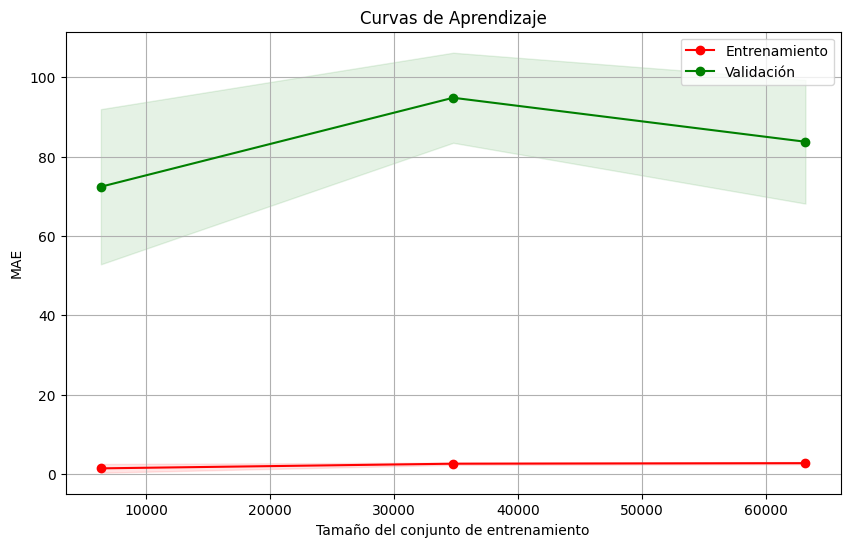

In [ ]:
from sklearn.model_selection import learning_curve                  #Curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X, y, train_sizes=np.linspace(0.1, 1.0, 3),
    scoring='neg_mean_absolute_error', cv=5
)

# Calcular los valores promedio y desviaciones estándar
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plotear las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.title('Curvas de Aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('MAE')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Entrenamiento')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validación')
plt.legend(loc='best')
plt.show()

# Metodos no supervisados

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Especificar el número de componentes principales deseados para PCA
n_components = 2

# Crear el modelo PCA
pca = PCA(n_components=n_components)

# Aplicar PCA a los datos normalizados
X_pca = pca.fit_transform(X_scaled)

# Crear un nuevo DataFrame con los componentes principales
columns_pca = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

# Seleccionar el número de clusters para K-Means
num_clusters = 3

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=1)

# Aplicar K-Means a los componentes principales
kmeans.fit(X_pca)

# Agregar las etiquetas de cluster al DataFrame original
d_02['cluster'] = kmeans.labels_

# Crear un nuevo DataFrame con los componentes principales y las etiquetas de cluster
df_pca_cluster = pd.concat([df_pca, d_02[['emission', 'cluster']]], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Imprimir los resultados del clustering
print("Resultados del Clustering con K-Means y Componentes Principales:")
print(df_pca_cluster)

Resultados del Clustering con K-Means y Componentes Principales:
                               PC1       PC2   emission  cluster
0                         1.371046 -0.414703        NaN      NaN
1                        -0.037173 -1.451774        NaN      NaN
2                         1.507253  1.308671        NaN      NaN
3                         4.475859 -1.145723        NaN      NaN
4                         0.864575 -2.810919        NaN      NaN
...                            ...       ...        ...      ...
ID_-3.299_30.301_2021_48       NaN       NaN  29.404171      2.0
ID_-3.299_30.301_2021_49       NaN       NaN  29.186497      2.0
ID_-3.299_30.301_2021_50       NaN       NaN  29.131205      2.0
ID_-3.299_30.301_2021_51       NaN       NaN  28.125792      2.0
ID_-3.299_30.301_2021_52       NaN       NaN  27.239302      2.0

[158046 rows x 4 columns]


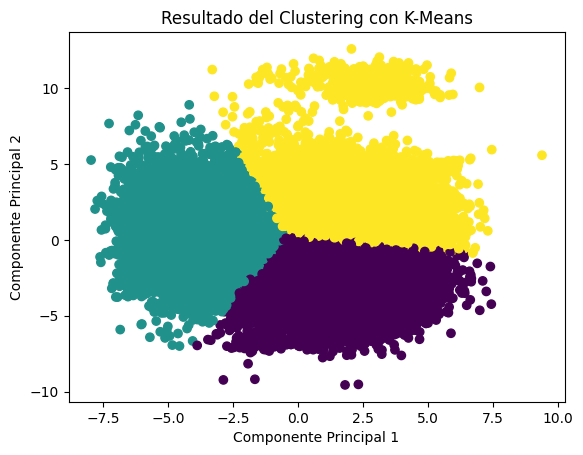

In [ ]:
# Visualizar los resultados del clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=d_02['cluster'], cmap='viridis')
plt.title('Resultado del Clustering con K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()